In [1]:
import warnings
warnings.filterwarnings("ignore")

# 加载数据集

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载 Iris 数据集
data = load_iris()
X = data.data
y = data.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 模型训练

## SVM模型

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 定义参数网格
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # 正则化参数
    'kernel': ['linear', 'rbf'],  # 核函数类型
    'gamma': ['scale', 'auto', 0.1, 1]  # 核函数参数
}

# 创建 SVM 模型
svm_model = SVC(random_state=42)

# 使用 GridSearchCV 调参
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best cross-validation score: {grid_search_svm.best_score_:.4f}")

# 使用最佳模型进行预测
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# 计算准确率
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy after tuning: {accuracy_svm:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9524
SVM Accuracy after tuning: 1.0000


## 神经网络模型

In [5]:
from sklearn.neural_network import MLPClassifier

# 定义参数网格
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50)],  # 隐藏层大小
    'activation': ['tanh', 'relu'],  # 激活函数
    'solver': ['adam', 'sgd'],  # 优化算法
    'learning_rate': ['constant', 'adaptive'],  # 学习率策略
    'max_iter': [500, 1000]  # 最大迭代次数
}

# 创建 MLP 模型
mlp_model = MLPClassifier(random_state=42)

# 使用 GridSearchCV 调参
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5, n_jobs=-1, verbose=1)
grid_search_mlp.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"Best parameters for MLP: {grid_search_mlp.best_params_}")
print(f"Best cross-validation score: {grid_search_mlp.best_score_:.4f}")

# 使用最佳模型进行预测
best_mlp_model = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test)

# 计算准确率
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy after tuning: {accuracy_mlp:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Best cross-validation score: 0.9524
MLP Accuracy after tuning: 1.0000


## 随机森林模型

In [6]:
from sklearn.ensemble import RandomForestClassifier

# 定义参数网格
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
    'max_features': ['sqrt', 'log2'],  # 最大特征数
    'min_samples_split': [2, 5, 10],  # 内部节点再划分所需最小样本数
    'min_samples_leaf': [1, 2, 4]  # 叶子节点的最小样本数
}

# 创建随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 使用 GridSearchCV 调参
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_:.4f}")

# 使用最佳模型进行预测
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# 计算准确率
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy after tuning: {accuracy_rf:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9429
Random Forest Accuracy after tuning: 1.0000


# 总结比较

In [7]:
import matplotlib.pyplot as plt
# 输出每个模型调优后的准确率
print(f"SVM Accuracy after tuning: {accuracy_svm:.4f}")
print(f"MLP Accuracy after tuning: {accuracy_mlp:.4f}")
print(f"Random Forest Accuracy after tuning: {accuracy_rf:.4f}")

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-t48k0mt0 because the default path (/home/lvhongxia/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


SVM Accuracy after tuning: 1.0000
MLP Accuracy after tuning: 1.0000
Random Forest Accuracy after tuning: 1.0000


In [9]:
import time

# 测量调优的训练时间
start = time.time()
grid_search_svm.fit(X_train, y_train)
end = time.time()
print(f"SVM GridSearchCV Training Time: {end - start:.4f} seconds")

start = time.time()
grid_search_mlp.fit(X_train, y_train)
end = time.time()
print(f"MLP GridSearchCV Training Time: {end - start:.4f} seconds")

start = time.time()
grid_search_rf.fit(X_train, y_train)
end = time.time()
print(f"Random Forest GridSearchCV Training Time: {end - start:.4f} seconds")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
SVM GridSearchCV Training Time: 0.0537 seconds
Fitting 5 folds for each of 64 candidates, totalling 320 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP GridSearchCV Training Time: 5.6074 seconds
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest GridSearchCV Training Time: 11.6632 seconds


# 消融实验

## SVM模型

       C  Accuracy  Training Time (s)
0    0.1  0.885714           0.010437
1    0.5  0.923810           0.007590
2    1.0  0.952381           0.007620
3    3.0  0.942857           0.007319
4    5.0  0.952381           0.007245
5   10.0  0.942857           0.007208
6   30.0  0.961905           0.007278
7   50.0  0.952381           0.007260
8   70.0  0.952381           0.007190
9  100.0  0.952381           0.007192


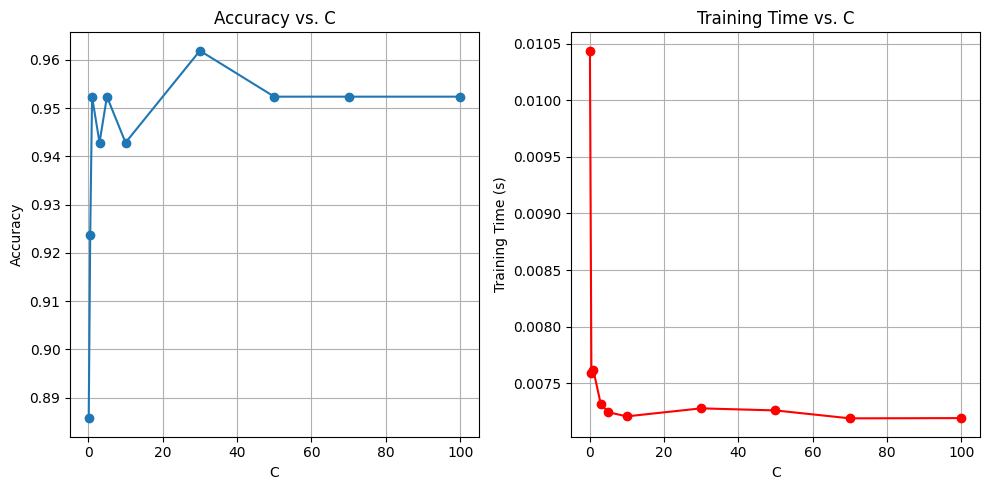

In [13]:
from sklearn.model_selection import cross_val_score

# 设置不同的C值
C_values = [0.1, 0.5, 1, 3, 5, 10, 30, 50, 70, 100]

results = []

for C in C_values:
    # 定义模型
    svm_model = SVC(C=C, kernel='rbf', gamma=0.1, random_state=1)
    
    # 记录训练时间
    start_time = time.time()
    # 使用5折交叉验证计算平均准确率
    scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
    end_time = time.time()
    
    mean_accuracy = np.mean(scores)
    training_time = end_time - start_time
    
    results.append({'C': C, 'Accuracy': mean_accuracy, 'Training Time (s)': training_time})

results_df = pd.DataFrame(results)

print(results_df)

# 可视化实验结果
# 准确率 vs C
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results_df['C'], results_df['Accuracy'], marker='o')
plt.title('Accuracy vs. C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)

# 训练时间 vs C
plt.subplot(1, 2, 2)
plt.plot(results_df['C'], results_df['Training Time (s)'], marker='o', color='red')
plt.title('Training Time vs. C')
plt.xlabel('C')
plt.ylabel('Training Time (s)')
plt.grid(True)

# 显示图形
plt.tight_layout()
plt.show()

## 随机森林模型

   n_estimators  Accuracy  Training Time (s)
0             2  0.895238           0.018604
1             3  0.942857           0.020612
2             4  0.923810           0.023408
3             5  0.923810           0.026864
4             6  0.923810           0.030879
5             7  0.923810           0.034080
6             8  0.933333           0.038129
7             9  0.923810           0.041267
8            10  0.933333           0.045120


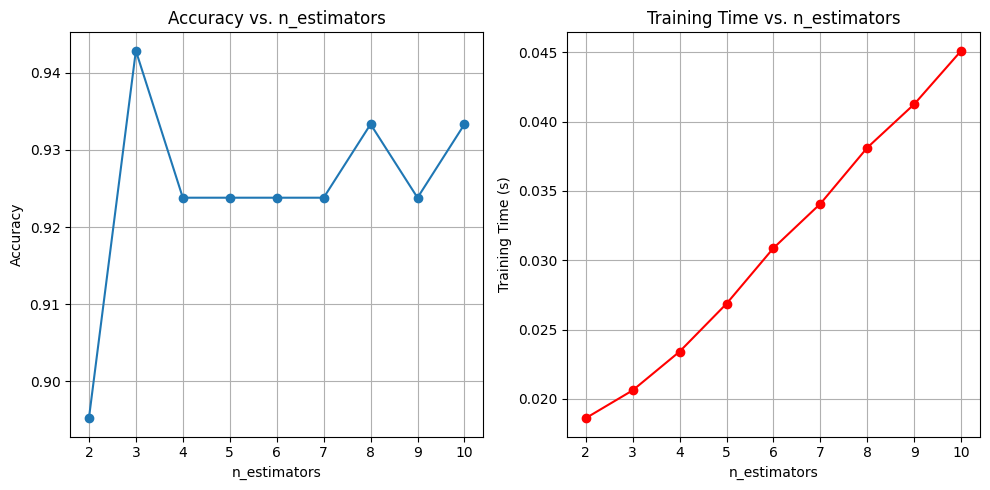

In [14]:
# 设置不同的 n_estimators 值
n_estimators_values = range(2, 11)

results = []

for n_estimators in n_estimators_values:
    # 定义模型
    rf_model = RandomForestClassifier(n_estimators=n_estimators, 
                                       min_samples_leaf=1, 
                                       min_samples_split=2, 
                                      max_depth=None,
                                      max_features='sqrt',
                                       random_state=1)
    
    # 记录训练时间
    start_time = time.time()
    # 使用5折交叉验证计算平均准确率
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    end_time = time.time()
    
    mean_accuracy = np.mean(scores)
    training_time = end_time - start_time
    
    results.append({'n_estimators': n_estimators, 'Accuracy': mean_accuracy, 'Training Time (s)': training_time})

results_df = pd.DataFrame(results)

print(results_df)

# 可视化实验结果
# 准确率 vs n_estimators
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results_df['n_estimators'], results_df['Accuracy'], marker='o')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)

# 训练时间 vs n_estimators
plt.subplot(1, 2, 2)
plt.plot(results_df['n_estimators'], results_df['Training Time (s)'], marker='o', color='red')
plt.title('Training Time vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Training Time (s)')
plt.grid(True)

# 显示图形
plt.tight_layout()
plt.show()